# CS339: Artificial Intelligence
## Project 2: K-Means Algorithm | Part 1
### by Amna Khalid
### 3/3/2021

In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

In [2]:
"""
This function is opening the file and
formatting the data for the algorithm.
Parameters: 
    filename: name of the file our data is stored in
Returns:
    None
"""

def data_new(filename):
    df = pd.read_csv(filename, sep=",", header=None)
    data = np.array(df)
    return data


In [3]:
"""This funtion assigns clusters to each sample
in our data based on the proximity 
of the center of the cluster to the point.
Parameters:
    centers: the centers of the clusters 
    data: our dataset 
Returns:
    clusters: list of clusters 
"""

def clustering(centers, data):
    clusters = []
    for i in range(data.shape[0]):
        dist = []
        for center in centers:
            dist.append(((sum((center - data[i])**2))**0.5))
        cluster = [j for j, val in enumerate(dist) if val==min(dist)]
        clusters.append(cluster[0])
    return clusters

In [4]:
"""
This function calculates new centers for 
the clusters based on the mean of the samples.
Parameters:
    clusters: list of clusters
    data: our dataset
Returns:
    new_centers: list of new centers for the clusters
"""

def Centers(clusters, data):
    df0 = pd.DataFrame(clusters, columns=['cluster'])
    new_centers = []
    df1 = pd.concat([pd.DataFrame(data), df0], axis=1)
    for v in set(df1['cluster']):
        curr = df1[df1['cluster']==v][df1.columns[:-1]]
        mean_clus = curr.mean(axis=0)
        new_centers.append(mean_clus)
    return new_centers

In [5]:
"""
This function calculates the sum of squares 
error i.e. the variance between the clusters.
Parameters:
    clusters: list of clusters
    data: our dataset
Returns:
    sum_of_sq: sum of squares error
"""

def SSE(clusters, data):
    df0 = pd.DataFrame(clusters, columns=['cluster'])
    df = pd.concat([pd.DataFrame(data), df0], axis=1)
    sum_of_sq = []
    for v in set(df['cluster']):
        curr = df[df['cluster']==v][df.columns[:-1]]
        mean_clus = curr.mean(axis=0)
        mean_c = np.matlib.repmat(mean_clus, curr.shape[0], 1)
        sub = (curr - mean_c)**2
        t = np.sum(np.sum(sub))
        sum_of_sq.append(t)      
    return sum_of_sq

In [6]:
"""
This function calculates the cluster means
and makes the algorithm converge by the 
repeated process. 
Parameters:
    None 
Returns:
    data: our dataset
    init_clus: list of initial clusters
    variances: the sum of squares error of each cluster
    clusters: list of final clusters
"""

def convergence():
    fn = 'data.csv'
    data = data_new(fn)
    
    k = 4
    variances = []

    centers = [data[i+2] for i in range(k)]
    clusters = clustering(centers, data)
    initial = clusters

    for i in range(10):
        centers = Centers(clusters, data)
        clusters = clustering(centers, data)
        sse = SSE(clusters, data)
        var = np.mean(sse)
        variances.append(var)
        
    return data, initial, variances, clusters
   

In [7]:
"""
This function shows a graph of the
sum of squared errors.
Parameters:
    None 
Returns: 
    None
"""

def graph1():
    c = convergence()
    data = c[0]
    variances = c[2]
    plt.subplots(figsize=(9,6))
    plt.plot(variances)
    plt.xlabel('Iterations')
    plt.ylabel('Sum of Squared Error');

In [8]:
"""
This function shows a graph of 
the initial clusters where each cluster 
is represented by a different color.
Parameters:
    None 
Returns: 
    None
"""

def graph2():
    c = convergence()
    data = c[0]
    init_clus = c[1]
    variances = c[2]
    plt.subplots(figsize=(9,6))
    plt.scatter(x = data[:,0], y = data[:,1], c = init_clus, cmap = plt.cm.Spectral);
    plt.xlabel('x-axis')
    plt.ylabel('y-axis');

In [9]:
"""
This function shows a graph of 
the final clusters after onvergence 
where each cluster is represented by
a different color.
Parameters:
    None 
Returns: 
    None
"""

def graph3():
    c = convergence()
    data = c[0]
    variances = c[2]
    clusters = c[3]
    plt.subplots(figsize=(9,6))
    plt.scatter(x = data[:,0], y = data[:,1], c= clusters, cmap = plt.cm.Spectral);
    plt.xlabel('x-axis')
    plt.ylabel('y-axis');

### Sum of Squared Error vs the number of loop iterations:

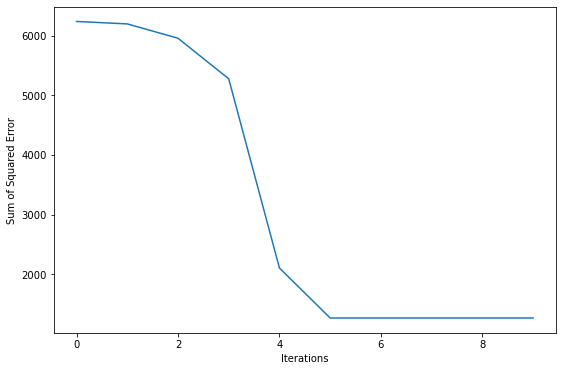

In [10]:
graph1()

### Initial clusters:

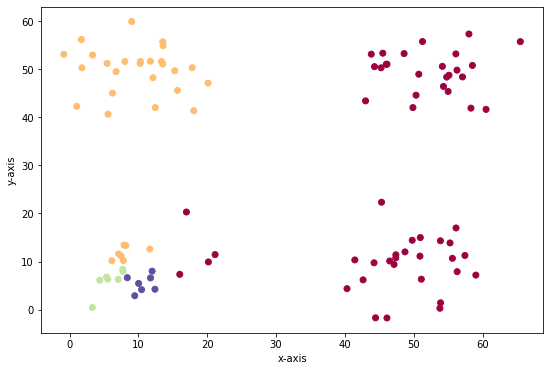

In [11]:
graph2()

### Clusters after convergence:

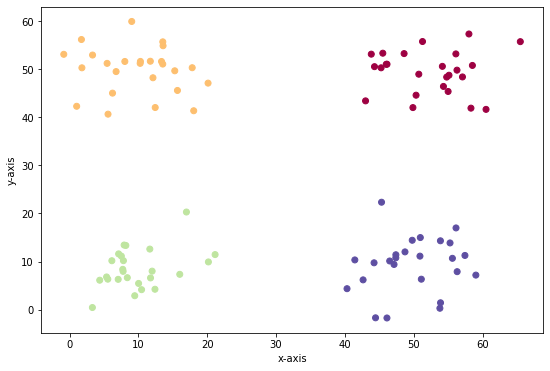

In [12]:
graph3()